# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_max_temp_celsius = city_max_temp - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp_celsius,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | tazacorte
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | sretensk
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | kolonia town
Processing Record 10 of Set 1 | kunashak
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | umluj
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | novyy urengoy
Processing Record 15 of Set 1 | zhanaozen
Processing Record 16 of Set 1 | icano
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | kingston
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | tura
Processing Record 22 of Set 1 | edinburgh of the seven sea

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            566
Lat             566
Lng             566
Max Temp (C)    566
Humidity        566
Cloudiness      566
Wind Speed      566
Country         566
Date            566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()



,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,25.20,71,69,4.54,MU,1684991545
1,tazacorte,28.6290,-17.9293,18.54,77,75,3.60,ES,1684991545
2,adamstown,-25.0660,-130.1015,23.61,71,66,2.25,PN,1684991545
3,olonkinbyen,70.9221,-8.7187,-2.42,90,100,17.15,SJ,1684991546
4,albany,42.6001,-73.9662,7.42,86,55,2.32,US,1684991250


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,25.20,71,69,4.54,MU,1684991545
1,tazacorte,28.6290,-17.9293,18.54,77,75,3.60,ES,1684991545
2,adamstown,-25.0660,-130.1015,23.61,71,66,2.25,PN,1684991545
3,olonkinbyen,70.9221,-8.7187,-2.42,90,100,17.15,SJ,1684991546
4,albany,42.6001,-73.9662,7.42,86,55,2.32,US,1684991250


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

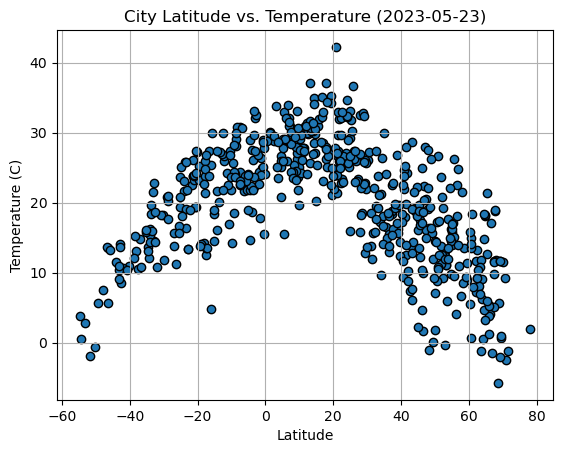

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-05-23)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(True)
#plt.gca().grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

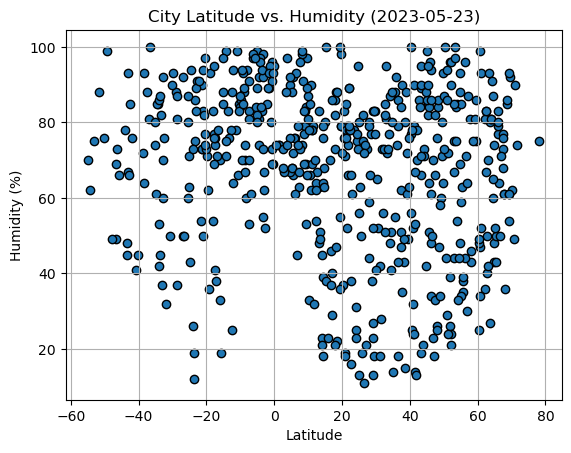

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-05-23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
#plt.gca().grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

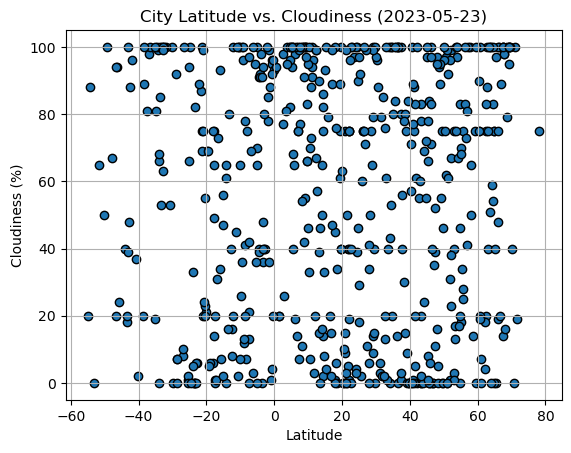

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-05-23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

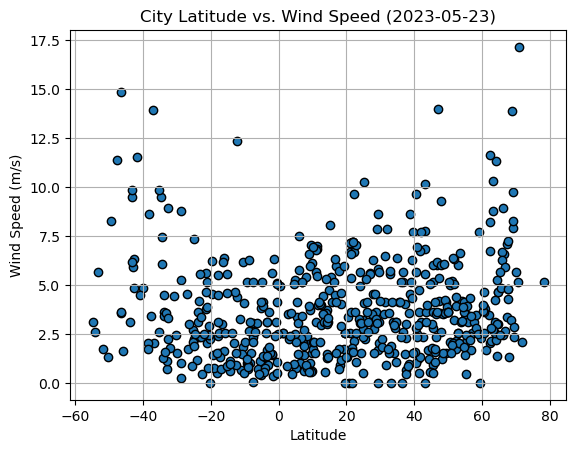

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-05-23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Convert the city_data list into a DataFrame
city_data_df = pd.DataFrame(city_data)

# Find cities in the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


In [13]:
# Perform a linear regression on Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp (C)"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept
print(regress_values)

1      22.530502
3       7.243818
4      17.480700
5      10.303858
6      13.994478
         ...    
560    19.962679
561    31.656551
562    18.884846
563    19.072075
565    18.203918
Name: Lat, Length: 389, dtype: float64


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
1,tazacorte,28.6290,-17.9293,18.54,77,75,3.60,ES,1684991545
3,olonkinbyen,70.9221,-8.7187,-2.42,90,100,17.15,SJ,1684991546
4,albany,42.6001,-73.9662,7.42,86,55,2.32,US,1684991250
5,yellowknife,62.4560,-114.3525,13.29,67,20,2.06,CA,1684991546
6,sretensk,52.2453,117.7093,20.78,21,99,2.16,RU,1684991546


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,25.20,71,69,4.54,MU,1684991545
2,adamstown,-25.0660,-130.1015,23.61,71,66,2.25,PN,1684991545
10,port-aux-francais,-49.3500,70.2167,5.67,99,100,8.29,TF,1684991547
12,hermanus,-34.4187,19.2345,12.11,85,99,7.45,ZA,1684991548
15,icano,-28.9193,-65.3282,20.77,88,92,1.02,AR,1684991548


###  Temperature vs. Latitude Linear Regression Plot

y = -0.36x + 32.88
The r-value is: 0.6175467665130016


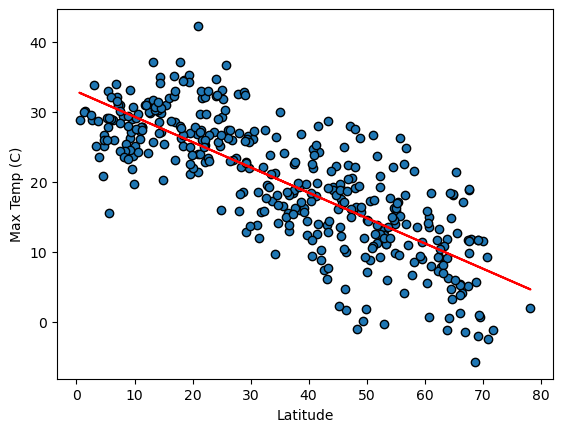

In [16]:
# Linear regression on Northern Hemisphere
# Defining axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp (C)"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.37x + 27.34
The r-value is: 0.577311224130106


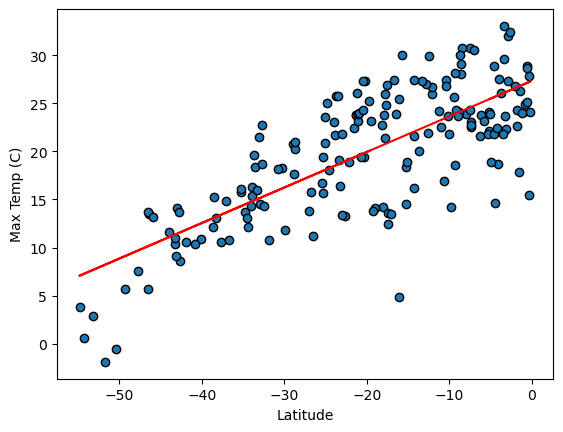

In [17]:
# Linear regression on Southern Hemisphere
# Defining axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp (C)"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
* In the Northern Hemisphere, the temperature decreases as you go further away from the equator (0). In the Southern Hemisphere, the temperature increases as you get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

y = -0.06x + 66.64
The r-value is: 0.0023213717300225555


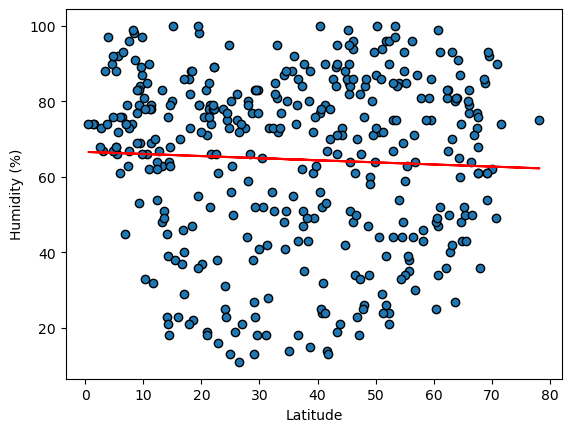

In [18]:
# Northern Hemisphere
# Defining axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.34x + 81.44
The r-value is: 0.06452181736138382


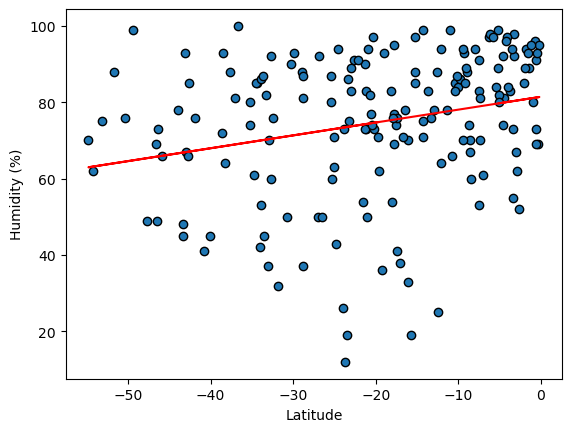

In [19]:
# Southern Hemisphere
# Defining axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
* There is no strong connection between humidity and latitude in the Northern and Southern Hemispheres. The data points are spread out, indicating that latitude alone is not enough to explain the differences in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.07x + 58.26
The r-value is: 0.0011740007962565732


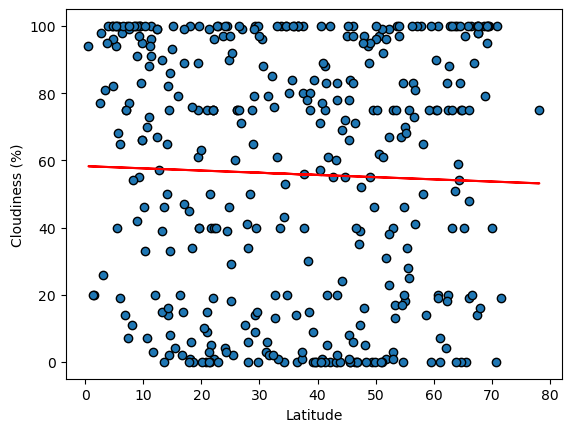

In [20]:
# Northern Hemisphere
# Defining axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.04x + 51.67
The r-value is: 0.0002693426906184598


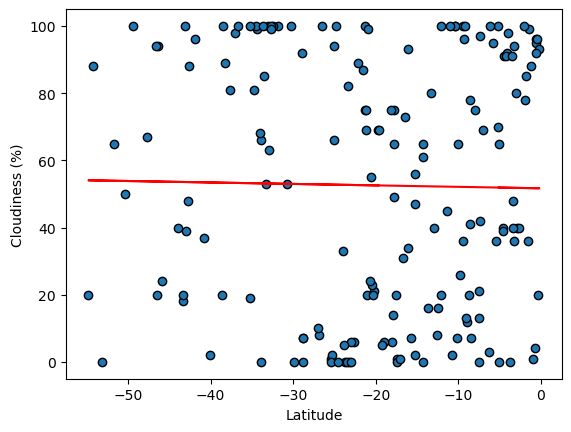

In [21]:
# Southern Hemisphere
# Defining axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**
* There is no strong connection between cloudiness and latitude in the Northern and Southern Hemispheres. The data points are scattered and spread out (similar to Humidity vs Latitude), indicating that latitude alone is insufficient to explain the differences in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 3.04
The r-value is: 0.029725794956009736


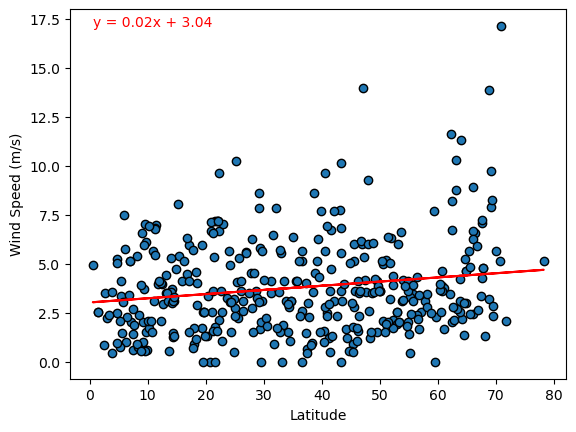

In [22]:
# Northern Hemisphere
# Defining axes
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq,(x_values.min(), y_values.max()),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.07x + 1.91
The r-value is: 0.13967469730944257


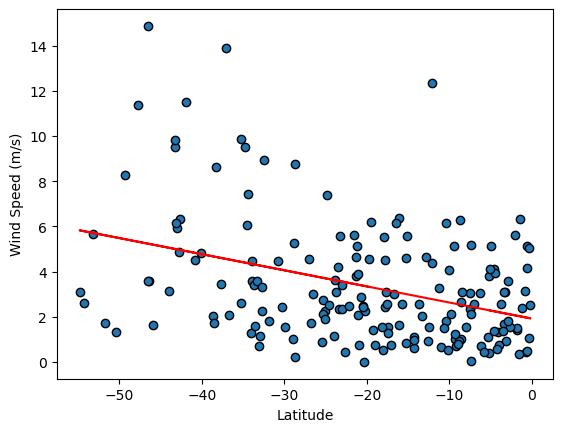

In [23]:
# Southern Hemisphere
# Defining axes
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq,(200,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
* The Northern Hemisphere has no strong relationship between wind speed and latitude. The data points are scattered, showing no clear pattern or trend. But in the Southern Hemisphere, wind speed and latitude have a weak positive relationship. As you move away from higher latitudes, the wind speed slightly increases, but the relationship is not very strong.